In [23]:
## Dimensionality Reduction

# ------- IMPORTS --------
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
# ------------------------ 

# For aesthetic plots
def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

from sklearn import decomposition


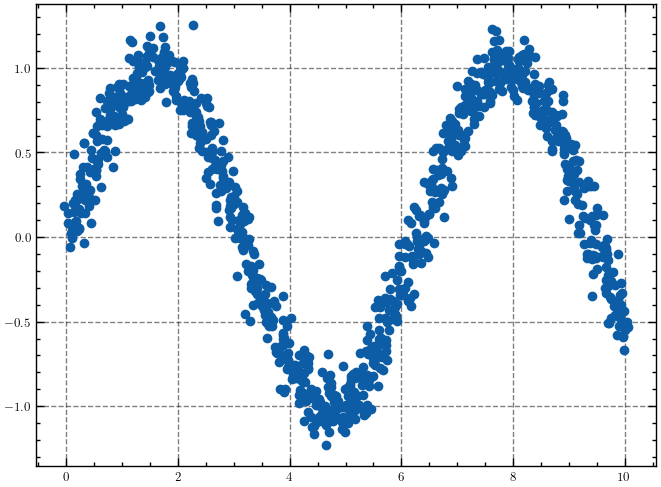

In [24]:
np.random.seed(42)

t_max, dt = 10, 0.01
omega = 1
sigma_t = 0.1
sigma_x = 0.1

t = np.arange(0,t_max, dt)
x = np.sin(t)

x_err = x + np.random.normal(loc=0.0, scale=sigma_x, size=t.shape)
t_err = t + np.random.normal(loc=0.0, scale=sigma_t, size=t.shape)

plt.scatter(t_err,x_err)

def rotation_matrix(theta, atype = 'radians'):
    if atype == 'degrees':
        theta = np.deg2rad(theta)
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

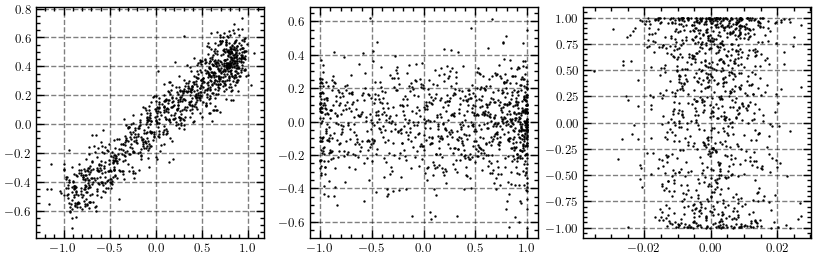

In [25]:
def noisy_project(t, sigma_m, sigma_s, theta, shift_x=0, shift_y=0):
    side_noise = np.random.normal(0, sigma_s, size=len(t)) # add gaussian noise
    move_noise = np.random.normal(0, sigma_m, size=len(t)) # add gaussian noise

    x = np.sin(t) + move_noise
    y = np.zeros_like(x) + side_noise
    ## perform projection

    rot_x = x*np.cos(theta) - y*np.sin(theta)
    rot_y = x*np.sin(theta) + y*np.cos(theta)
    return (rot_x - shift_x, rot_y - shift_y)

dt = 0.01
max_time = 10
omega = 1

t = np.arange(0, max_time, dt)


fig, axs = plt.subplots(1, 3, figsize=(10, 3))
x1, y1 = noisy_project(t, 0.1, 0.1, 0.5, 0, 0)
axs[0].scatter(x1, y1, s=0.5, c='black')
x2, y2 = noisy_project(t, 0, 0.2, 0, 0, 0)
axs[1].scatter(x2, y2, s=0.5, color='black')
x3, y3 = noisy_project(t, 0, 0.01, np.pi/2, 0, 0)
axs[2].scatter(x3, y3, s=0.5, color='black')

(6, 1000)
(6, 6)
[-2.83433768e-17  1.04938601e-04  7.01910091e-03  9.66561861e-03
  3.93920075e-02  1.32710876e+00]


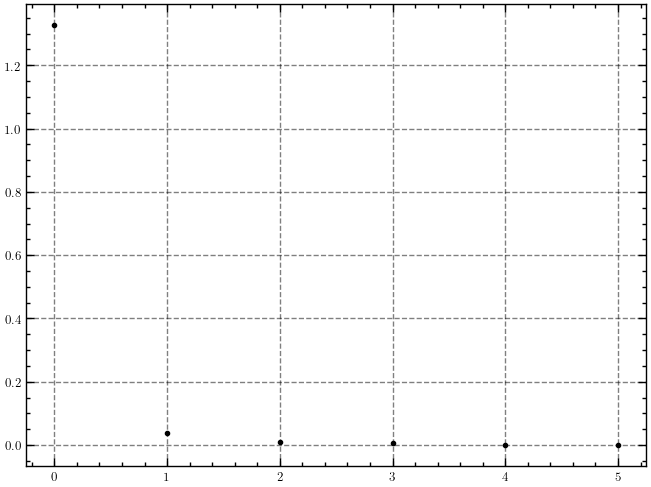

In [39]:
X = np.array([x1, y1, x2, y2, x3, y3])
# print((X))
print(X.shape)

cov_matrix = np.cov(X)
print(cov_matrix.shape)
eigval, eigvec = np.linalg.eigh(cov_matrix)
print(eigval)
eigval = eigval[::-1]
plt.plot(eigval,'k.')
plt.show()

In [51]:
X = np.array([x1, y1, x2, y2, x3, y3])
print(X.shape)

cov_matrix = np.cov(X)
eigval, eigvec = np.linalg.eigh(cov_matrix)



eigval = eigval[::-1]
signals = eigvec.T @ X
signals = signals [::-1]

fig, axs = plt.subplots(6, 1, figsize=(9, 18))

for idx, ax in enumerate(axs):
    ax.plot(t, signals[idx])
    ax.set_ylabel(f'PC #{idx}')
    ax.set_ylim(-2,2)

(6, 1000)
Error in callback <function _draw_all_if_interactive at 0x000002D3E52E5C60> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'PC #0'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmprwi0khkx 3422ca603955d490ff1c9fef0f981157.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(3422ca603955d490ff1c9fef0f981157.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsmath.sty
For additional information on amsmath, use the `?' option.
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amstext.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsgen.sty))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsbsy.sty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsopn.sty))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amssymb.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amsfonts.sty))

(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/firstaid\underscore-ltx
.sty) (C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty
)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file 3422ca603955d490ff1c9fef0f981157.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! You can't use `macro parameter character #' in horizontal mode.
l.29 {\rmfamily PC #
                    0}%
No pages of output.
Transcript written on C:\Users\verci\.matplotlib\tex.cache\34\22\tmprwi0khkx\34
22ca603955d490ff1c9fef0f981157.log.




RuntimeError: latex was not able to process the following string:
b'PC #0'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp4ecc_3m_ 3422ca603955d490ff1c9fef0f981157.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 24.1) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(3422ca603955d490ff1c9fef0f981157.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsmath.sty
For additional information on amsmath, use the `?' option.
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amstext.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsgen.sty))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsbsy.sty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsmath\amsopn.sty))
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amssymb.sty
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/amsfonts\amsfonts.sty))

(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/firstaid\underscore-ltx
.sty) (C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty
)
(C:\Users\verci\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file 3422ca603955d490ff1c9fef0f981157.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! You can't use `macro parameter character #' in horizontal mode.
l.29 {\rmfamily PC #
                    0}%
No pages of output.
Transcript written on C:\Users\verci\.matplotlib\tex.cache\34\22\tmp4ecc_3m_\34
22ca603955d490ff1c9fef0f981157.log.




<Figure size 900x1800 with 6 Axes>

[[-1.35056094e-01 -5.98016147e-02  1.92438155e-02 ... -4.23696896e-01
  -3.34403119e-01 -4.30942801e-01]
 [-1.50717635e-01 -4.91375858e-02 -7.97828244e-02 ... -3.72964533e-01
  -1.44606057e-01 -2.53116800e-01]
 [ 0.00000000e+00  9.99983333e-03  1.99986667e-02 ... -5.18607950e-01
  -5.27131998e-01 -5.35603335e-01]
 [-1.72698721e-01 -6.24069779e-03  3.60337441e-03 ...  6.22582040e-01
   1.61607238e-01 -1.69613120e-01]
 [ 1.11408136e-02  6.30930834e-03  9.42060184e-03 ...  5.27389062e-03
   5.10663203e-05 -3.98763764e-03]
 [-6.82178085e-19  9.99983333e-03  1.99986667e-02 ... -5.18607950e-01
  -5.27131998e-01 -5.35603335e-01]]
components:  (6, 1000)
weights:  (6, 6)
[9.37689127e-01 3.73739684e-02 1.43472919e-02 1.05896128e-02
 3.47629774e-31 1.36819950e-32]


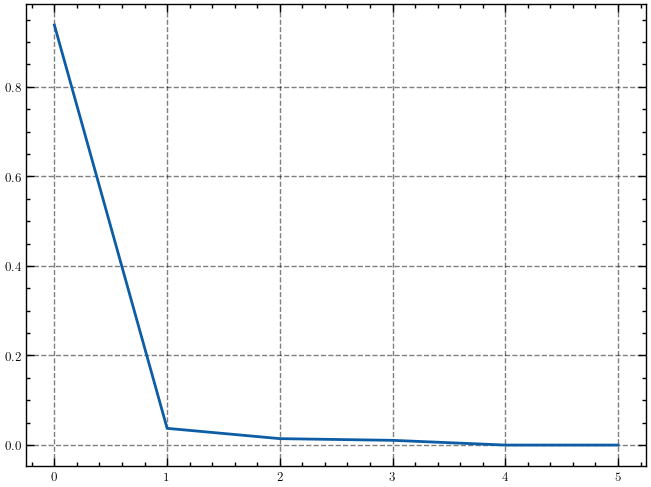

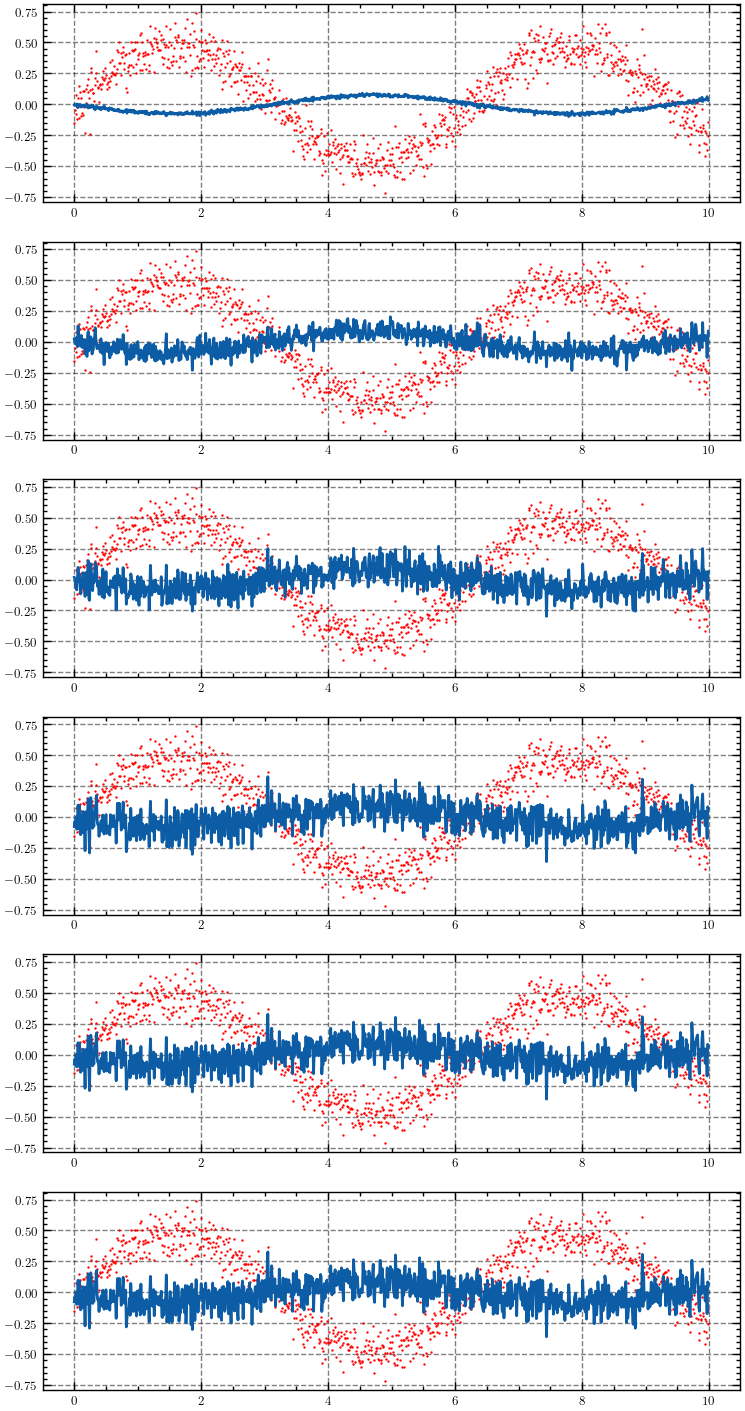

In [ ]:
# What if I use sklearn instead?
print(X)
pca = decomposition.PCA().fit(X)
reproj = pca.transform(X)

# > the pca.components_ gives me the PCs themselves
print("components: ", pca.components_.shape)

# > the reproj gives me the weights needed to reconstruct
# the original data as a linear combination of the PCs 
print("weights: ", reproj.shape)

print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.show()

fig, axs = plt.subplots(6, 1, figsize=(9, 18))
id = 1
for index, pc in enumerate(pca.components_):
    # axs[index].plot(pc)
    axs[index].plot(t, reproj[id,:index+1] @ pca.components_[:index+1])
    axs[index].scatter(t, X[id], s=0.5, color='red')


(400, 112, 92)


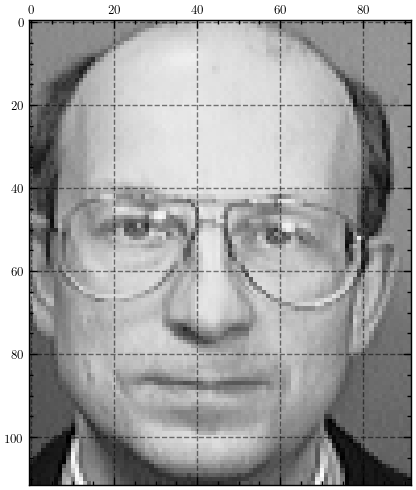

In [ ]:
the_faces = np.load("att-faces-400.npz")['dataset']

print(the_faces.shape)

plt.matshow(the_faces[123,:,:], cmap='Greys_r')

## Perform PCA 
# explain variance
# PC0 and PC1 weights
## pick 1 image, recreate with 1pc, 10pc, 100pc


(400, 10304)


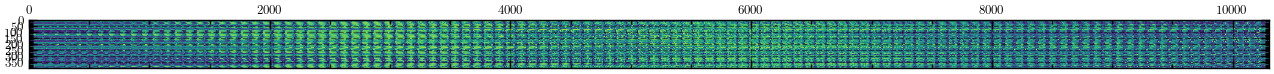

In [ ]:

dataset_tab = np.stack([i.flatten() for i in the_faces], axis=0)
plt.matshow(dataset_tab[:, :])
print(dataset_tab.shape)

Principal Components shape: (400, 10304)
Reprojected data shape: (400, 400)
Explained variance ratio: [1.76095605e-01 1.29066408e-01 6.84104636e-02 5.57895005e-02
 5.10990582e-02 3.36253196e-02 2.44719721e-02 2.33106278e-02
 1.96220074e-02 1.80277918e-02 1.43892309e-02 1.39792198e-02
 1.11904060e-02 1.06727378e-02 9.74646397e-03 9.13624838e-03
 8.76041688e-03 8.44451506e-03 7.35490071e-03 6.95367204e-03
 6.70946855e-03 6.38510194e-03 5.93075575e-03 5.43796876e-03
 5.29091293e-03 4.93587088e-03 4.81331814e-03 4.78885882e-03
 4.48026136e-03 4.36139898e-03 4.29075491e-03 3.99166532e-03
 3.94500652e-03 3.80308460e-03 3.69536062e-03 3.50369792e-03
 3.39997117e-03 3.36425612e-03 3.17379134e-03 3.00237024e-03
 2.95352913e-03 2.90716486e-03 2.81769619e-03 2.77597271e-03
 2.67932541e-03 2.58719479e-03 2.54260865e-03 2.48915632e-03
 2.44768267e-03 2.39954819e-03 2.35481886e-03 2.19706632e-03
 2.16731988e-03 2.13554245e-03 2.12465459e-03 2.05380097e-03
 2.00459501e-03 1.95424655e-03 1.93052774e-0

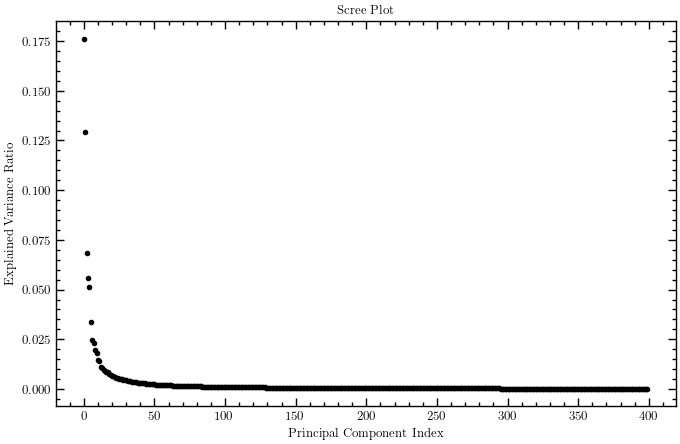

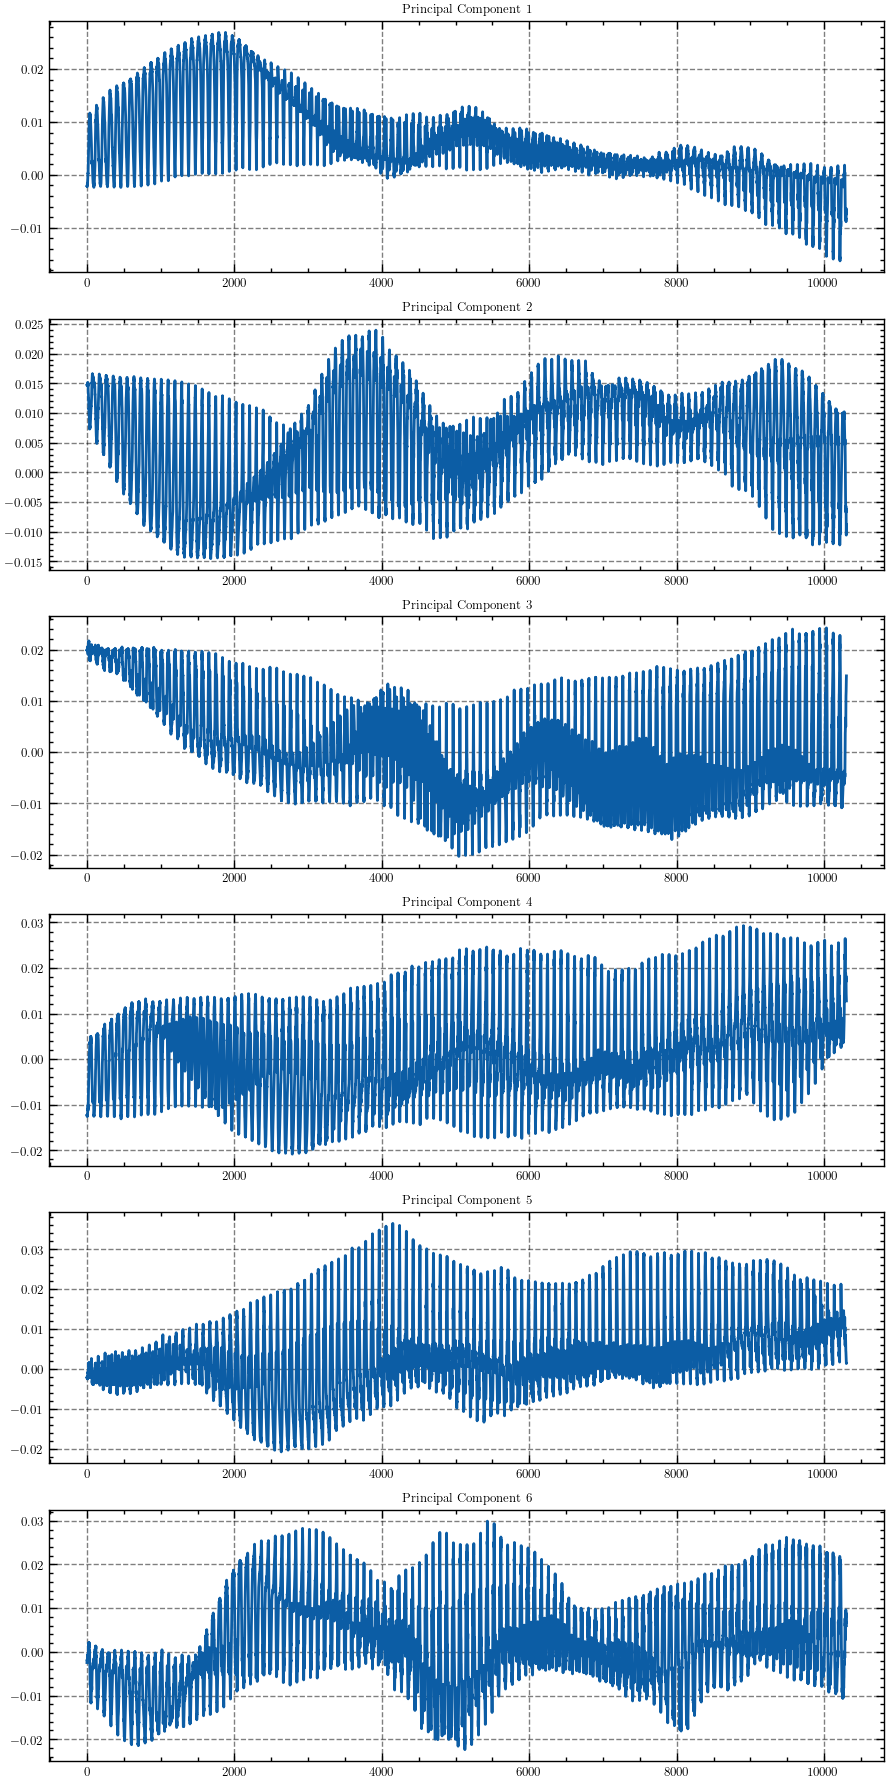

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assume dataset_tab is (400, 10141) -> 400 samples, 10141 features
data_set_tab = dataset_tab.astype(np.float32)

In [ ]:
  # Ensure float32 for efficiency

# Perform PCA
pca = PCA()
reproj = pca.fit_transform(data_set_tab)  # This both fits and transforms

# Print PCA details
print("Principal Components shape:", pca.components_.shape)  # (n_components, features)
print("Reprojected data shape:", reproj.shape)  # (samples, n_components)

# Explained variance ratio (fraction of variance explained by each PC)
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Plot scree plot (log scale for better visualization)
plt.figure(figsize=(8, 5))
plt.plot(explained_variance, 'k.')
# plt.yscale('log')
plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid()
plt.show()

# Plot first few principal components
fig, axs = plt.subplots(6, 1, figsize=(9, 18))
for index in range(6):  # First 6 PCs
    axs[index].plot(pca.components_[index])
    axs[index].set_title(f"Principal Component {index+1}")
plt.tight_layout()
plt.show()


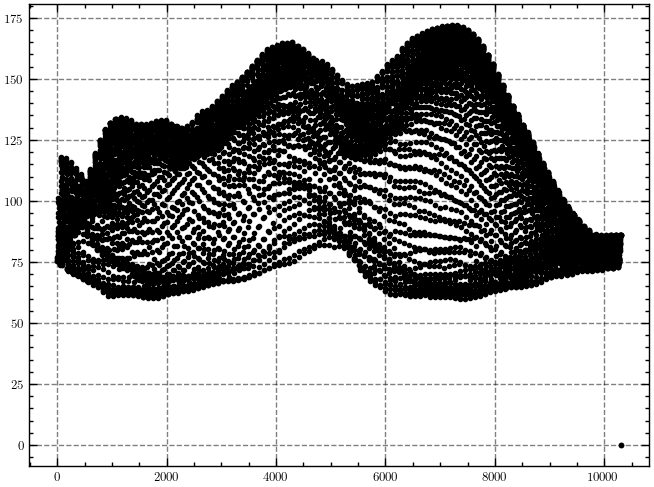

In [44]:
# Assume dataset_tab is (400, 10141) -> 400 samples, 10141 features
data_set_tab = dataset_tab.astype(np.float32)

# Compute covariance matrix
cov_matrix = np.cov(data_set_tab, rowvar=False)  # rowvar=False ensures features are columns

# Compute eigenvalues and eigenvectors
eigval, eigvec = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
eigval = eigval[::-1]
eigvec = eigvec[:, ::-1]

# Plot eigenvalues (Scree Plot)
plt.plot(eigval, 'k.')
